In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(7.7,7.7)}) # graph size

In [2]:
df_answer = pd.read_csv('df_cluster_answer.csv')

In [3]:
df_answer.head()

,Id,tempo_base_answer,qnt_answer
0,5074298,368,1
1,5075280,367,1
2,5086912,366,1
3,5085715,366,1
4,5073718,366,1


In [4]:
df_download = pd.read_csv('df_cluster_downloads.csv')

In [5]:
df_download.columns = ['Id', 'qnt_downloads']

In [6]:
df_download.head()

,Id,qnt_downloads
0,17711766,468
1,17719675,329
2,17758134,216
3,17718051,155
4,17731369,152


In [7]:
df_upload = pd.read_csv('df_cluster_upload.csv')

In [8]:
df_upload.head()

,Id,tempo_base_upload,qnt_upload
0,6244000,205.0,1
1,6252042,204.0,1
2,6255211,203.0,1
3,6248658,203.0,2
4,6245261,203.0,17


In [9]:
df_aggregate = pd.read_csv('df_cluster_aggregate.csv')

In [10]:
df_aggregate.head()

,CourseName,Id,UniversityId,stateName
0,engenharia florestal e silvicultura,17765174,663764,rio grande do norte
1,engenharia eletrica,17765145,663507,pernambuco
2,veterinaria / medicina veterinaria,17765111,663528,minas gerais
3,direito,17765101,664264,sao paulo
4,veterinaria / medicina veterinaria,17765100,664284,sao paulo


# unindo as bases

In [11]:
df_1 = pd.merge(df_aggregate, df_answer, on='Id')

In [12]:
df_1.shape

(2, 6)

In [13]:
df_2 = pd.merge(df_aggregate, df_download, on='Id')

In [14]:
df_2.shape

(245, 5)

In [15]:
df_2.head()

,CourseName,Id,UniversityId,stateName,qnt_downloads
0,veterinaria / medicina veterinaria,17765111,663528,minas gerais,18
1,direito,17765101,664264,sao paulo,1
2,veterinaria / medicina veterinaria,17765100,664284,sao paulo,2
3,pedagogia,17765092,664166,parana,1
4,licenciatura em historia,17765077,1614530,rio grande do sul,1


# qual universidade faz mais downloads?

In [16]:
university_downloads = df_2.groupby('UniversityId')['qnt_downloads'].sum().reset_index()

university_downloads.head()

,UniversityId,qnt_downloads
0,661625,1
1,661710,1
2,661719,11
3,661728,3
4,661852,1


In [17]:
university_downloads.sort_values(by='qnt_downloads', ascending=False, inplace=True)

In [18]:
print(university_downloads.shape)
university_downloads.head()

(149, 2)


,UniversityId,qnt_downloads
108,664623,80
107,664565,38
119,665123,21
56,663528,20
106,664564,19


In [19]:
university_downloads['porcentagem'] = (university_downloads['qnt_downloads']
                                       .apply(lambda x: 100 * float(x) / (university_downloads['qnt_downloads'].sum())))

university_downloads.sort_values(by='porcentagem', ascending=False, inplace=True) #.head(8)
university_downloads.head()

,UniversityId,qnt_downloads,porcentagem
108,664623,80,13.986014
107,664565,38,6.643357
119,665123,21,3.671329
56,663528,20,3.496503
106,664564,19,3.321678


In [20]:
university_downloads = university_downloads.head(15)
university_downloads['porcentagem'].sum()

52.97202797202798

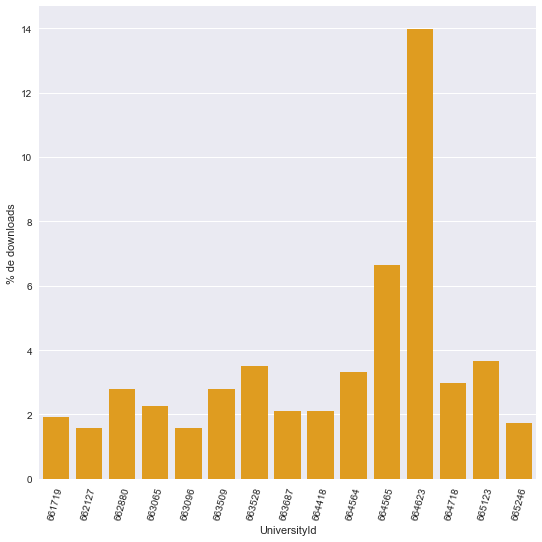

In [21]:
g_university_downloads = sns.barplot(x='UniversityId', y='porcentagem', data=university_downloads, color='orange')

for tick in g_university_downloads.get_xticklabels():
    tick.set_rotation(75)

plt.xlabel('UniversityId')  
plt.ylabel('% de downloads');
plt.tight_layout()
g_university_downloads.figure.savefig('por_downloads_uniId.png', dpi=100)

# qual curso faz mais downloads? 

In [22]:
curso_downloads = df_2.groupby('CourseName')['qnt_downloads'].sum().reset_index()

curso_downloads.head()

,CourseName,qnt_downloads
0,administracao,27
1,administracao publica,2
2,agronomia,6
3,analise e desenvolvimento de sistemas,2
4,antropologia social,1


In [23]:
curso_downloads.shape

(85, 2)

In [24]:
curso_downloads['porcentagem'] = (curso_downloads['qnt_downloads']
                                       .apply(lambda x: 100 * float(x) / (curso_downloads['qnt_downloads'].sum())))

curso_downloads.sort_values(by='porcentagem', ascending=False, inplace=True) #.head(8)
curso_downloads.head(15)

,CourseName,qnt_downloads,porcentagem
34,engenharia civil,55,9.615385
29,enfermagem,37,6.468531
46,fisioterapia,29,5.069930
0,administracao,27,4.720280
84,veterinaria / medicina veterinaria,27,4.720280
24,direito,26,4.545455
9,biologia / ciencias biologicas,21,3.671329
68,nutricao,21,3.671329
38,engenharia de producao,18,3.146853
50,gestao da seguranca,16,2.797203


In [25]:
curso_downloads = curso_downloads.head(12)
curso_downloads['porcentagem'].sum()

53.67132867132867

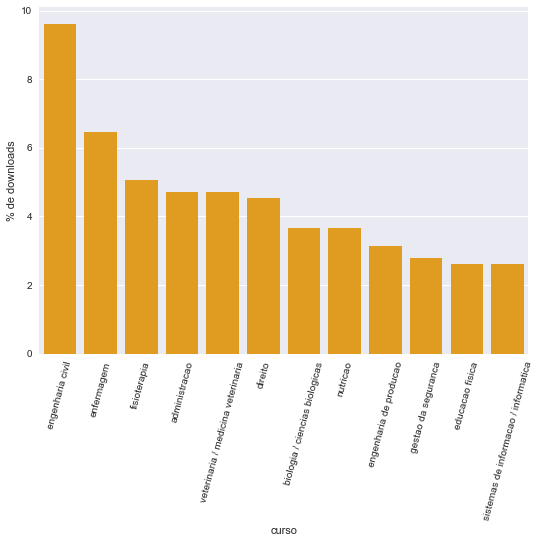

In [26]:
g_curso_downloads = sns.barplot(x='CourseName', y='porcentagem', data=curso_downloads, color='orange')

for tick in g_curso_downloads.get_xticklabels():
    tick.set_rotation(75)

plt.xlabel('curso')  
plt.ylabel('% de downloads');
plt.tight_layout()
g_curso_downloads.figure.savefig('porc_downloads_curso.png', dpi=100)

In [27]:
df_3 = pd.merge(df_2, df_upload, on='Id')

In [28]:
df_3

,CourseName,Id,UniversityId,stateName,qnt_downloads,tempo_base_upload,qnt_upload
0,gestao de processos gerenciais,17762675,664486,sao paulo,1,0.0,3


# bases de download + upload

In [29]:
df_4 = pd.merge(df_download, df_upload, on='Id')

In [30]:
df_4.shape

(53, 4)

In [31]:
df_4.head()

,Id,qnt_downloads,tempo_base_upload,qnt_upload
0,17720410,24,0.0,2
1,17731657,16,0.0,1
2,17732190,12,1.0,29
3,17747950,11,0.0,1
4,17732532,10,0.0,2


In [32]:
# apenas variaveis numericas
df_n = df_4.select_dtypes(include = ['float64', 'int64'])
df_n.head()

,Id,qnt_downloads,tempo_base_upload,qnt_upload
0,17720410,24,0.0,2
1,17731657,16,0.0,1
2,17732190,12,1.0,29
3,17747950,11,0.0,1
4,17732532,10,0.0,2


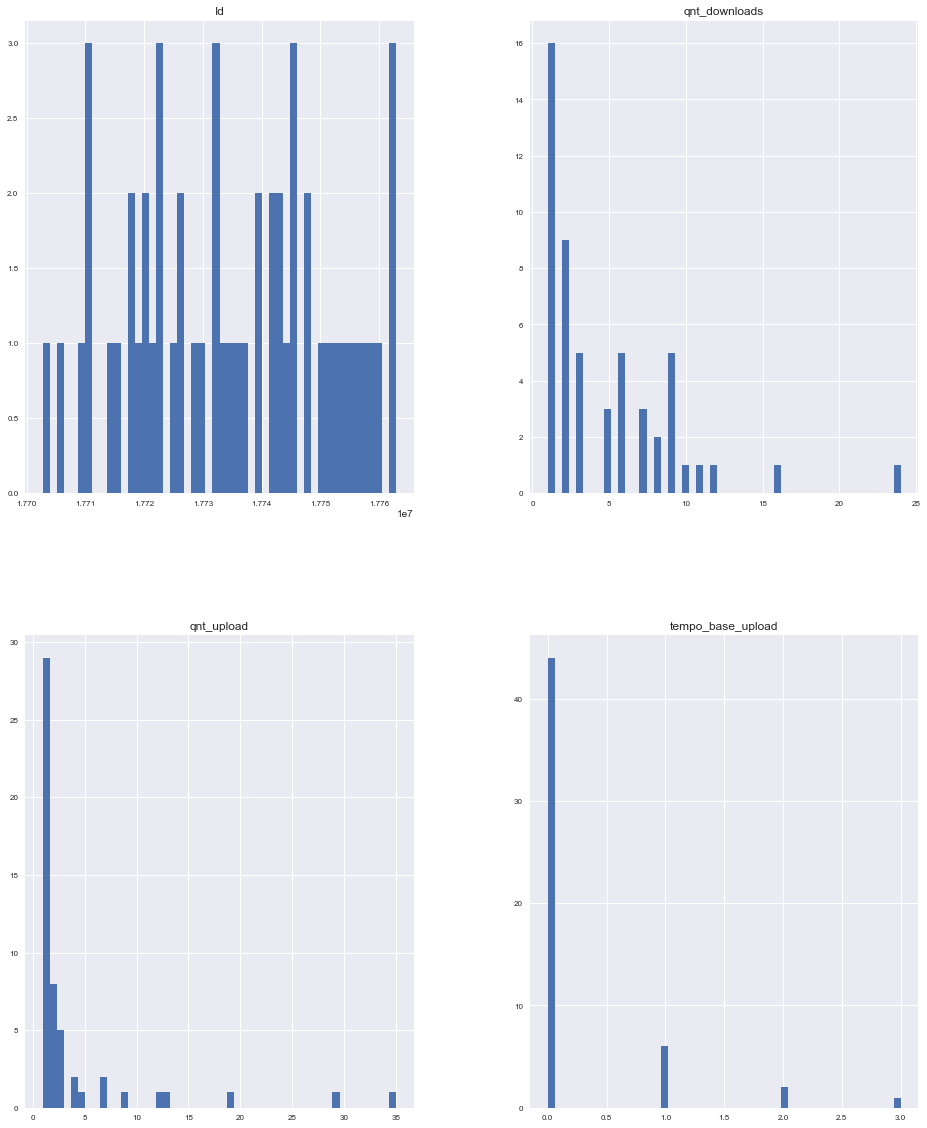

In [33]:
df_n.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

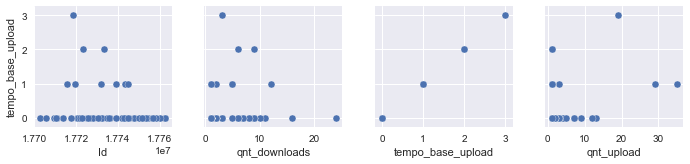

In [34]:
for i in range(0, len(df_n.columns), 5):
    sns.pairplot(data=df_n,
                x_vars=df_n.columns[i:i+5],
                y_vars=['tempo_base_upload'])

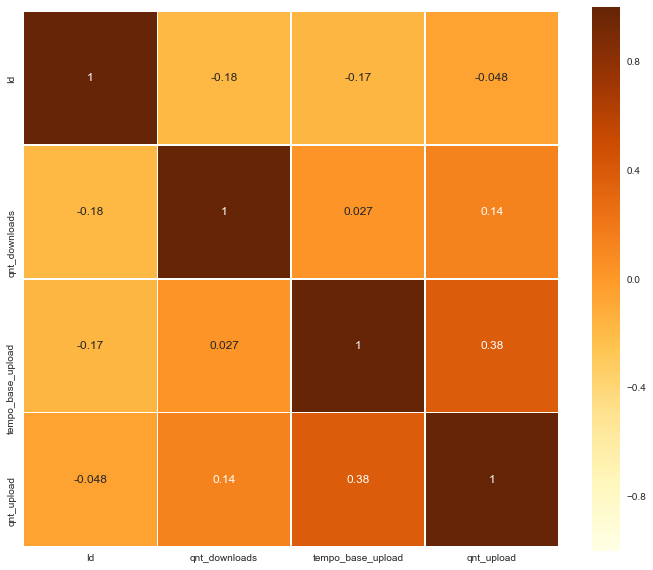

In [35]:
# correlacao
corr = df_n.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr, 
            cmap='YlOrBr', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True);

plt.savefig('correlacao.png', dpi=100)

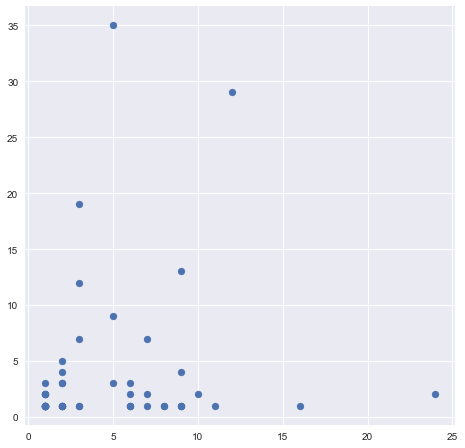

In [36]:
plt.scatter(df_4['qnt_downloads'], df_4['qnt_upload'])
plt.show()

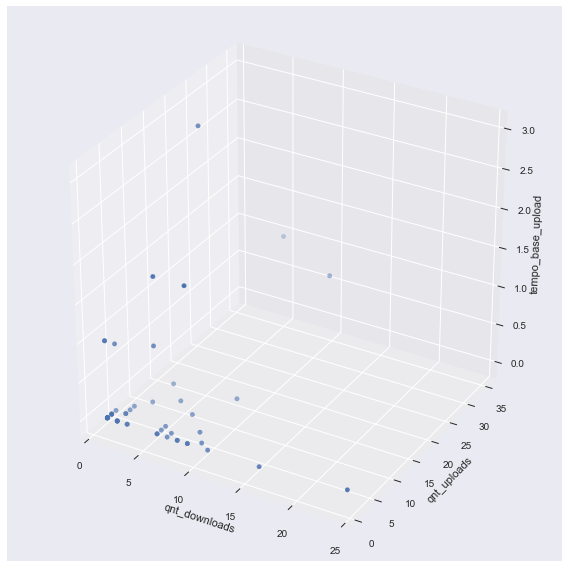

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_4['qnt_downloads'], df_4['qnt_upload'], df_4['tempo_base_upload'])
ax.set_xlabel('qnt_downloads')
ax.set_ylabel('qnt_uploads')
ax.set_zlabel('tempo_base_upload');
plt.savefig('variaveis_cluster.png', dpi=100)


In [38]:
from sklearn.cluster import KMeans

In [39]:
X = df_4[['qnt_downloads', 'qnt_upload', 'tempo_base_upload']]

In [40]:
# terminando o numero K
from scipy.spatial.distance import cdist

In [41]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

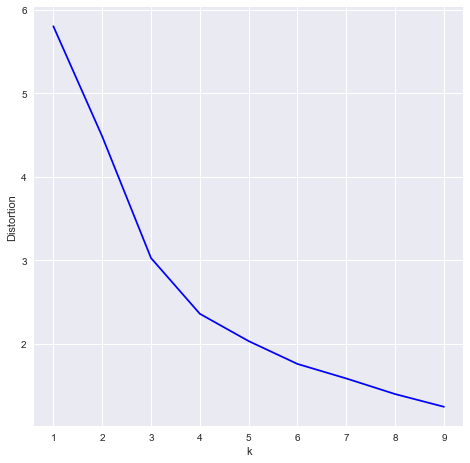

In [42]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()
plt.savefig('k.png', dpi=100);

In [43]:
# devido ao gráfico acima escolhemos k=5

In [44]:
kmeans = KMeans(n_clusters=5)

In [45]:
kmeans = kmeans.fit(X)

In [46]:
y_kmeans = kmeans.predict(X)

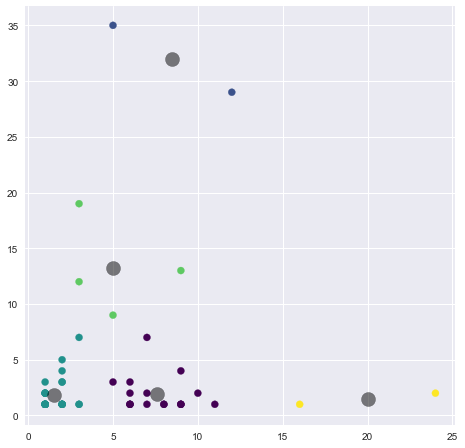

In [47]:
plt.scatter(df_4['qnt_downloads'], df_4['qnt_upload'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.savefig('resultado_cluster.png', dpi=100);

In [48]:
y_kmeans

array([4, 4, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3,
       2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [49]:
df_4.shape

(53, 4)

In [50]:
df_4['cluster'] = y_kmeans

In [51]:
df_4.head()

,Id,qnt_downloads,tempo_base_upload,qnt_upload,cluster
0,17720410,24,0.0,2,4
1,17731657,16,0.0,1,4
2,17732190,12,1.0,29,1
3,17747950,11,0.0,1,0
4,17732532,10,0.0,2,0


In [52]:
df_4[df_4.cluster==0]
# pouco tempo na base e poucos downloads

,Id,qnt_downloads,tempo_base_upload,qnt_upload,cluster
3,17747950,11,0.0,1,0
4,17732532,10,0.0,2,0
5,17747971,9,0.0,4,0
7,17736497,9,0.0,1,0
8,17726589,9,0.0,1,0
9,17733510,9,2.0,1,0
10,17745181,8,0.0,1,0
11,17702804,8,0.0,1,0
12,17743406,7,0.0,7,0
13,17734714,7,0.0,1,0


In [53]:
df_4[df_4.cluster==1]
# muitos uploads

,Id,qnt_downloads,tempo_base_upload,qnt_upload,cluster
2,17732190,12,1.0,29,1
21,17743663,5,1.0,35,1


In [54]:
df_4[df_4.cluster==2]
# muitos downloads

,Id,qnt_downloads,tempo_base_upload,qnt_upload,cluster
23,17720231,3,0.0,7,2
24,17742063,3,0.0,1,2
26,17730332,3,0.0,1,2
28,17710388,2,0.0,1,2
29,17749998,2,0.0,1,2
30,17754532,2,0.0,1,2
31,17705788,2,0.0,4,2
32,17753639,2,0.0,5,2
33,17719329,2,1.0,1,2
34,17722138,2,0.0,3,2


In [55]:
df_4[df_4.cluster==3]
# poucos downloads e alguns uploads

,Id,qnt_downloads,tempo_base_upload,qnt_upload,cluster
6,17710993,9,0.0,13,3
22,17762846,5,0.0,9,3
25,17721073,3,0.0,12,3
27,17718312,3,3.0,19,3


In [56]:
df_4[df_4.cluster==4]
# muitos uploads e alguns downloads

,Id,qnt_downloads,tempo_base_upload,qnt_upload,cluster
0,17720410,24,0.0,2,4
1,17731657,16,0.0,1,4
